# <center> Ajuste de Hiperparâmetros </center>

<br/>

<div style="text-align: center;font-size: 90%;">
    Bruno Dias dos Santos<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Programa de Pós-Graduação em Computação Aplicada, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brasil
    <br/><br/>
    Contato: <div><a href="mailto:bruno.santos@inpe.br">bruno.santos@inpe.br</a></div>
    <br/><br/>
    Última atualização: 29 de Abril de 2022
</div>
<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Resumo.</b> Este Notebook apresenta uma metodologia para selecionar hiperparâmetros do algoritmo de classificação <i>Random Forest</i>. Dado uma tabela de atributos (.csv) contendo uma variável com as classes amostrais,  será testado o melhor modelo possível gerado pelo <i>Random Forest </i>, dado um conjunto de hiperparametros. Os hiperparâmetros são escolhidos utilizando a técnica <i>GridSearchCV</i>, adotando um <i>K-Fold</i> com 5 grupos e medindo o desempenho de cada combinação com o <i> F1-Score </i>.     
</div>    

<br/>


Chamando as Bibliotecas:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd
import shapely

Carregando a base de dados já tratada anteriormente:

In [2]:
obj = gpd.read_file("C:\\Users\\dias-bruno\\Desktop\\INPE-SER\\DISSERTACAO\\SHAPEFILES\\segmentos_cobertura_tratados2.shp")

In [3]:
obj

,DN,IFVE_MEAN,B3_Mean,IFAG_MEAN,IFSE_MEAN,B3_Max_Val,fid_percen,COT_VARIA,B2_Contras,IFSE_MIN,...,PSAHPEIDX,DV_MAX,COR_MIN,PBOX_AREA,B3_Kurtosi,DE_MIN,DE_MAX,COR_MAX,TARGET,geometry
0,1,0.033137,0.634287,1.000000,0.425901,0.636713,0.0,0.000000,0.486425,0.618315,...,0.788005,0.046165,1.000000,0.000685,0.453338,8.654224e-08,0.801776,0.764825,None,"POLYGON ((739940.000 9732728.000, 739950.000 9..."
1,2,0.033137,0.000000,1.000000,0.172157,0.000000,0.0,0.000313,0.210418,0.296634,...,0.943763,0.186153,0.504139,0.001473,0.476609,1.153896e-07,0.886834,0.783749,Rios e lagos,"POLYGON ((739942.000 9732736.000, 739944.000 9..."
2,3,0.033137,0.662995,1.000000,0.461586,0.639785,0.0,0.002784,0.536289,0.603314,...,0.985553,0.031388,1.000000,0.000820,0.433178,1.153896e-07,0.000000,0.000000,None,"POLYGON ((739930.000 9732722.000, 740034.000 9..."
3,4,0.033137,0.764718,0.789035,0.554612,0.734255,0.0,0.000000,0.000000,0.849480,...,0.940704,0.085048,1.000000,0.000820,0.451098,1.153896e-07,0.834874,0.000000,None,"POLYGON ((739930.000 9732720.000, 739998.000 9..."
4,5,0.033137,0.000000,1.000000,0.231065,0.000000,0.0,0.005049,0.233645,0.260426,...,0.506072,0.052276,1.000000,0.000519,0.419609,8.654224e-08,0.886834,0.858335,Rios e lagos,"POLYGON ((740076.000 9732714.000, 740096.000 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65817,64072,0.828111,0.783347,0.391486,0.192856,0.764977,0.0,0.001498,0.058357,0.379626,...,0.644065,0.195988,0.220690,0.001470,0.500596,8.796972e-01,0.962278,0.899264,Veg. Arbustiva,"POLYGON ((760930.000 9723718.000, 760936.000 9..."
65818,64056,0.561046,0.709323,1.000000,0.215089,0.768049,0.0,0.017892,0.157874,0.333470,...,0.811320,0.110104,0.130738,0.003432,0.521434,1.153896e-07,0.962278,0.940263,None,"POLYGON ((761808.000 9723760.000, 761812.000 9..."
65819,64057,0.834991,0.783680,0.370870,0.181409,0.748080,0.0,0.001555,0.118653,0.320691,...,0.546310,0.285322,0.130808,0.000904,0.509777,8.881883e-01,0.924556,0.880850,Veg. Arbustiva,"POLYGON ((760520.000 9723704.000, 760524.000 9..."
65820,64063,0.824751,0.766941,0.383361,0.208067,0.765745,0.0,0.001342,0.070844,0.387608,...,0.646262,0.919753,0.190582,0.002647,0.443462,1.153896e-07,0.948040,0.911903,Veg. Arbustiva,"POLYGON ((760596.000 9723716.000, 760600.000 9..."


In [4]:
geom = obj

Visualizando estatísticas descritivas da base de dados já tratada:

In [5]:
obj.describe()

,DN,IFVE_MEAN,B3_Mean,IFAG_MEAN,IFSE_MEAN,B3_Max_Val,fid_percen,COT_VARIA,B2_Contras,IFSE_MIN,...,SE_RANGE,B2_Kurtosi,PSAHPEIDX,DV_MAX,COR_MIN,PBOX_AREA,B3_Kurtosi,DE_MIN,DE_MAX,COR_MAX
count,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,...,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,65822.000000,6.582200e+04,65822.000000,65822.000000
mean,33807.231078,0.510326,0.784424,0.452125,0.481504,0.787608,0.071508,0.030562,0.297192,0.492241,...,0.538099,0.477607,0.548209,0.266922,0.222606,0.001902,0.485599,1.503846e-01,0.890890,0.887726
std,19578.108268,0.188986,0.131367,0.167249,0.188366,0.117803,0.166597,0.068543,0.206239,0.168630,...,0.158850,0.136658,0.144392,0.220814,0.150390,0.014842,0.155546,2.941441e-01,0.129640,0.106994
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,16859.250000,0.372147,0.761770,0.335399,0.329223,0.751920,0.000000,0.002048,0.137706,0.372140,...,0.459850,0.410623,0.449776,0.097264,0.137258,0.000514,0.410595,8.654224e-08,0.886834,0.863340
50%,33770.500000,0.489234,0.802943,0.422850,0.485289,0.795699,0.000000,0.009227,0.256958,0.459012,...,0.534381,0.458531,0.534108,0.195988,0.185264,0.000828,0.475000,1.153896e-07,0.910318,0.901601
75%,50747.750000,0.641316,0.838341,0.537602,0.615201,0.844086,0.011860,0.026840,0.411333,0.599967,...,0.621577,0.531705,0.634873,0.378601,0.257575,0.001424,0.560181,1.153896e-07,0.924556,0.934896
max,67873.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000


Definicação da variável identificadora de cada feição e da variável com as classes amostrais:

In [6]:
indice = 'DN'
TARGET = 'TARGET'

In [7]:
target = []

for classe in obj[TARGET].unique():
    if not pd.isnull(classe):
        target.append(classe)

target

['Rios e lagos',
 'Veg. Arbustiva',
 'Veg. Herbácea',
 'Solo exposto',
 'Asfalto',
 'Brilhosos',
 'Estradas',
 'Fibrocimentos',
 'Cerâmicas',
 'Nuvem',
 'Sombra']

In [8]:
obj = obj.replace(to_replace='None', value=np.nan).dropna()
obj

,DN,IFVE_MEAN,B3_Mean,IFAG_MEAN,IFSE_MEAN,B3_Max_Val,fid_percen,COT_VARIA,B2_Contras,IFSE_MIN,...,PSAHPEIDX,DV_MAX,COR_MIN,PBOX_AREA,B3_Kurtosi,DE_MIN,DE_MAX,COR_MAX,TARGET,geometry
1,2,0.033137,0.000000,1.000000,0.172157,0.000000,0.0,0.000313,0.210418,0.296634,...,0.943763,0.186153,0.504139,0.001473,0.476609,1.153896e-07,0.886834,0.783749,Rios e lagos,"POLYGON ((739942.000 9732736.000, 739944.000 9..."
4,5,0.033137,0.000000,1.000000,0.231065,0.000000,0.0,0.005049,0.233645,0.260426,...,0.506072,0.052276,1.000000,0.000519,0.419609,8.654224e-08,0.886834,0.858335,Rios e lagos,"POLYGON ((740076.000 9732714.000, 740096.000 9..."
9,10,0.033137,0.000000,1.000000,0.163007,0.596774,0.0,0.003652,0.146116,0.210986,...,0.508384,0.080474,0.369439,0.000822,0.992811,8.654224e-08,0.905695,0.946904,Rios e lagos,"POLYGON ((740148.000 9732702.000, 740150.000 9..."
16,17,0.033137,0.000000,1.000000,0.058097,0.000000,0.0,0.000809,0.038934,0.150349,...,0.841543,0.200617,0.333396,0.002334,0.531508,1.153896e-07,0.910318,0.877187,Rios e lagos,"POLYGON ((740202.000 9732678.000, 740208.000 9..."
21,22,0.682604,0.889196,0.254270,0.502477,0.928571,0.0,0.021767,0.138505,0.352161,...,0.677926,0.315501,0.122823,0.002741,0.444098,1.153896e-07,0.924556,0.965098,Veg. Arbustiva,"POLYGON ((740072.000 9732678.000, 740084.000 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65814,64068,0.873403,0.795764,0.325485,0.199185,0.790323,0.0,0.001581,0.066904,0.326065,...,0.593274,0.820988,0.085879,0.003546,0.556700,0.000000e+00,0.962278,0.943981,Veg. Arbustiva,"POLYGON ((760452.000 9723748.000, 760456.000 9..."
65815,64059,0.860002,0.792544,0.345339,0.198045,0.767281,0.0,0.001345,0.077175,0.381562,...,0.550506,0.345679,0.147468,0.002726,0.466081,7.082116e-01,0.924556,0.951301,Veg. Arbustiva,"POLYGON ((760896.000 9723722.000, 760898.000 9..."
65817,64072,0.828111,0.783347,0.391486,0.192856,0.764977,0.0,0.001498,0.058357,0.379626,...,0.644065,0.195988,0.220690,0.001470,0.500596,8.796972e-01,0.962278,0.899264,Veg. Arbustiva,"POLYGON ((760930.000 9723718.000, 760936.000 9..."
65819,64057,0.834991,0.783680,0.370870,0.181409,0.748080,0.0,0.001555,0.118653,0.320691,...,0.546310,0.285322,0.130808,0.000904,0.509777,8.881883e-01,0.924556,0.880850,Veg. Arbustiva,"POLYGON ((760520.000 9723704.000, 760524.000 9..."


Separandos os dados de treinamento e teste:

In [9]:
X = pd.DataFrame(obj.iloc[:,1:-2])
Y = pd.DataFrame(obj[TARGET]).to_numpy()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=42)

In [11]:
x_train.shape

(15075, 67)

In [12]:
y_train.shape

(15075, 1)

In [13]:
x_test.shape

(6461, 67)

In [14]:
y_test.shape

(6461, 1)

Visualizando as classes amostrais:

In [15]:
obj[TARGET].unique()

array(['Rios e lagos', 'Veg. Arbustiva', 'Veg. Herbácea', 'Solo exposto',
       'Asfalto', 'Brilhosos', 'Estradas', 'Fibrocimentos', 'Cerâmicas',
       'Nuvem', 'Sombra'], dtype=object)

In [16]:
obj.groupby(TARGET)[indice].nunique()

TARGET
Asfalto             665
Brilhosos           239
Cerâmicas           423
Estradas            663
Fibrocimentos       212
Nuvem               104
Rios e lagos        527
Solo exposto        338
Sombra               61
Veg. Arbustiva    14741
Veg. Herbácea      3563
Name: DN, dtype: int64

Seleção os hiperparametros e dos valores a serem testados no método RandomizedSearchCV:

In [17]:
parametros = {'n_estimators':[1,20,50,100,150,200,250,300,350,400,450,500,550,600,700,800,900,1000,1500,2000],
              'criterion':['gini','entropy'],
              'max_depth':[5,10,20, None],
              'min_samples_split':[2,5,10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

Definindo o GridSearchCV:

In [18]:
modelo = RandomizedSearchCV(estimator = RandomForestClassifier(), n_iter = 100, verbose=2, random_state=42, param_distributions = parametros, scoring='f1_macro', n_jobs=-1, cv=5)

Gerando o modelo de classificação Random Forest:

In [19]:
modelo.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 91.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 223.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 296.1min finished
C:\Users\dias-bruno\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 20, 50, 100, 150,
                                                         200, 250, 300, 350,
                                                         400, 450, 500, 550,
                                                         600, 700, 800, 900,
                                                         1000, 1500, 2000]},
                   random_state=42, scoring='f1_macro', verbose=2)

Visualizando a melhor combinação de hiperparâmetros:

In [20]:
modelo.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [21]:
modelo.best_score_

0.919198287884951

In [22]:
modelo.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=600)

Utilizando o modelo treinado para prever a base de dados de teste:

In [23]:
y_pred = modelo.predict(x_test)

Visualizando as variáveis mais utilizadas no modelo Random Forest:

<BarContainer object of 67 artists>

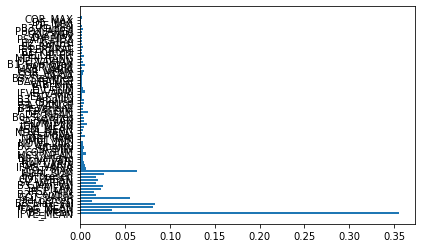

In [26]:
plt.barh(x_test.columns, modelo.best_estimator_.feature_importances_ )

Visualizando métricas de desempenho do modelo de classificação na base de teste:

In [27]:
macro = f1_score(y_test, y_pred, average = 'macro')
wei = f1_score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)

results = {'F1_Score_Macro': macro,
             'F1_Score_Weighted': wei,
             'Global Acuraccy': accuracy 
            }

pd.DataFrame.from_dict(results, orient='index', dtype=None, columns=['Métricas'])

,Métricas
F1_Score_Macro,0.926817
F1_Score_Weighted,0.987634
Global Acuraccy,0.988082


Matriz de confusão aplicado sobre a base de teste:

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 198    0    0    2    0    0    0    0    0    0    0]
 [   0   69    0    0    0    1    0    2    0    0    0]
 [   1    1  100   19    3    1    0    2    0    0    0]
 [   1    1    0  195    0    2    0    0    0    0    0]
 [   8    2    4    6   41    0    0    0    0    0    3]
 [   0    0    0    0    0   27    0    0    0    0    4]
 [   0    0    0    0    0    0  158    0    0    0    0]
 [   1    2    3    3    0    0    0   89    0    0    3]
 [   0    0    0    0    0    0    0    0   17    0    1]
 [   0    0    0    0    0    0    0    0    0 4422    0]
 [   0    0    0    0    0    0    0    0    0    1 1068]]
                precision    recall  f1-score   support

       Asfalto       0.95      0.99      0.97       200
     Brilhosos       0.92      0.96      0.94        72
     Cerâmicas       0.93      0.79      0.85       127
      Estradas       0.87      0.98      0.92       199
 Fibrocimentos       0.93      0.64      0.76        64
         Nuvem       0.8

In [29]:
data = {'Reference': y_test.flatten(), 'Predicted': y_pred}
df = pd.DataFrame(data, columns = ['Reference','Predicted'])
mc = pd.crosstab(df['Reference'], df['Predicted'], rownames=['Reference'], colnames=['Predicted'])

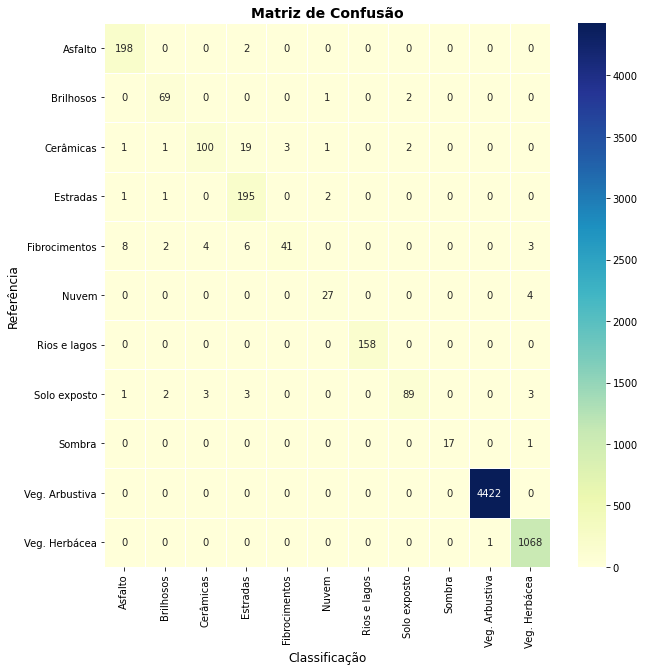

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(mc, annot=True,fmt='g',  cmap = 'YlGnBu',linewidths=.5)
plt.title('Matriz de Confusão', fontweight='bold', fontsize=14)
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Referência',fontsize=12)
plt.show()

In [31]:
classe = []
Accuracy = []
Precision = []
Recall = []
F1_Score = []

for i in range(mc.shape[0]):
    TP = mc.iloc[i,i]
    FP = mc.iloc[i,:].sum() - TP
    FN = mc.iloc[:,i].sum() - TP
    TN = mc.sum().sum()-TP-FP-FN
    
    classe.append(mc.index[i]) 
    Accuracy.append((TP+TN)/mc.sum().sum())
    Precision.append(TP/(TP+FP))
    Recall.append(TP/(TP+FN))
    F1_Score.append(((2*Precision[i]*Recall[i])/(Precision[i] + Recall[i])))
    

avaliacao = {'classe': classe,
            'Precision': Precision,
             'Recall': Recall,
             'F1_Score':F1_Score,
             'Acuraccy':Accuracy
            }
       
pd.DataFrame(avaliacao)

,classe,Precision,Recall,F1_Score,Acuraccy
0,Asfalto,0.990000,0.947368,0.968215,0.997988
1,Brilhosos,0.958333,0.920000,0.938776,0.998607
2,Cerâmicas,0.787402,0.934579,0.854701,0.994738
3,Estradas,0.979899,0.866667,0.919811,0.994738
4,Fibrocimentos,0.640625,0.931818,0.759259,0.995976
5,Nuvem,0.870968,0.870968,0.870968,0.998762
6,Rios e lagos,1.000000,1.000000,1.000000,1.000000
7,Solo exposto,0.881188,0.956989,0.917526,0.997524
8,Sombra,0.944444,1.000000,0.971429,0.999845
9,Veg. Arbustiva,1.000000,0.999774,0.999887,0.999845


Inserindo a classificação no csv da base de dados:

In [32]:
geom['CLASSIFICACAO'] = modelo.predict(geom.iloc[:,1:-2])

<AxesSubplot:>

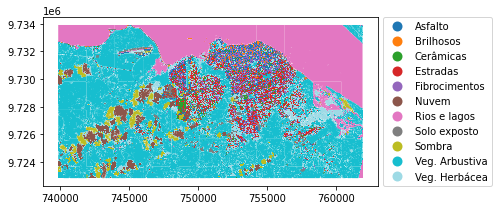

In [33]:
geom.plot(column ='CLASSIFICACAO', legend=True, cmap = 'tab20', categorical=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

Salvando o CSV com a classificação final:

In [34]:
geom.to_file("C:\\Users\\dias-bruno\\Desktop\\INPE-SER\\DISSERTACAO\\SHAPEFILES\\classificacao2.shp")

<ipython-input-34-abf8ed8c6304>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geom.to_file("C:\\Users\\dias-bruno\\Desktop\\INPE-SER\\DISSERTACAO\\SHAPEFILES\\classificacao2.shp")
